# Natalia Palej A00279259
Software Design with Artificial Intelligence for Cloud Computing, Year 4

# Part 5: Visualizations with Built-in Statistical Features 

In [313]:
import pandas as pd 
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [314]:
df = pd.read_pickle('data/cleaned_pokemon_data.pkl')

In [315]:
df.head()

,name,national_no,species,ev_yield,catch_rate,base_friendship,base_exp,growth_rate,egg_groups,egg_cycles,...,pokemon_img_url,height_m,weight_kg,primary_type,secondary_type,male_percentage,female_percentage,gen,primary_ability,secondary_ability
0,bulbasaur,1,Seed Pokémon,1 Sp. Atk,45.0,50.0,64,Medium Slow,"Grass, Monster",20,...,https://img.pokemondb.net/artwork/bulbasaur.jpg,0.7,6.9,grass,poison,87.5,12.5,1,Overgrow,Chlorophyll
1,ivysaur,2,Seed Pokémon,"1 Sp. Atk, 1 Sp. Def",45.0,50.0,142,Medium Slow,"Grass, Monster",20,...,https://img.pokemondb.net/artwork/ivysaur.jpg,1.0,13.0,grass,poison,87.5,12.5,1,Overgrow,Chlorophyll
2,venusaur,3,Seed Pokémon,"2 Sp. Atk, 1 Sp. Def",45.0,50.0,236,Medium Slow,"Grass, Monster",20,...,https://img.pokemondb.net/artwork/venusaur.jpg,2.0,100.0,grass,poison,87.5,12.5,1,Overgrow,Chlorophyll
3,charmander,4,Lizard Pokémon,1 Speed,45.0,50.0,62,Medium Slow,"Dragon, Monster",20,...,https://img.pokemondb.net/artwork/charmander.jpg,0.6,8.5,fire,Pure,87.5,12.5,1,Blaze,Solar Power
4,charmeleon,5,Flame Pokémon,"1 Sp. Atk, 1 Speed",45.0,50.0,142,Medium Slow,"Dragon, Monster",20,...,https://img.pokemondb.net/artwork/charmeleon.jpg,1.1,19.0,fire,Pure,87.5,12.5,1,Blaze,Solar Power


In [316]:
df.columns

Index(['name', 'national_no', 'species', 'ev_yield', 'catch_rate',
       'base_friendship', 'base_exp', 'growth_rate', 'egg_groups',
       'egg_cycles', 'hp', 'min_hp', 'max_hp', 'attack', 'min_attack',
       'max_attack', 'defense', 'min_defense', 'max_defense', 'sp_atk',
       'min_sp_atk', 'max_sp_atk', 'sp_def', 'min_sp_def', 'max_sp_def',
       'speed', 'min_speed', 'max_speed', 'total', 'evo_path',
       'pokemon_img_url', 'height_m', 'weight_kg', 'primary_type',
       'secondary_type', 'male_percentage', 'female_percentage', 'gen',
       'primary_ability', 'secondary_ability'],
      dtype='object')

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   name               405 non-null    object  
 1   national_no        405 non-null    Int64   
 2   species            405 non-null    object  
 3   ev_yield           405 non-null    object  
 4   catch_rate         405 non-null    float64 
 5   base_friendship    405 non-null    float64 
 6   base_exp           405 non-null    int32   
 7   growth_rate        405 non-null    object  
 8   egg_groups         405 non-null    object  
 9   egg_cycles         405 non-null    int64   
 10  hp                 405 non-null    Int64   
 11  min_hp             405 non-null    Int64   
 12  max_hp             405 non-null    Int64   
 13  attack             405 non-null    Int64   
 14  min_attack         405 non-null    Int64   
 15  max_attack         405 non-null    Int64   
 16  defense 

## Data Grouping

### Compare basic 6 stats across various generations

In [319]:
# List of stats
stats = ['hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']

In [320]:
# Define colors for each generation
gen_colors = {
    1: '#f30d0d', 2: '#22f30d', 3: '#0db4f3', 4: '#000000',
    5: '#ff61fb', 6: '#f5fd33', 7: '#9b34df ', 8: '#fdb933'
}

## Create Subplot (Facet)

## Main Loop for Vioolin Subplots

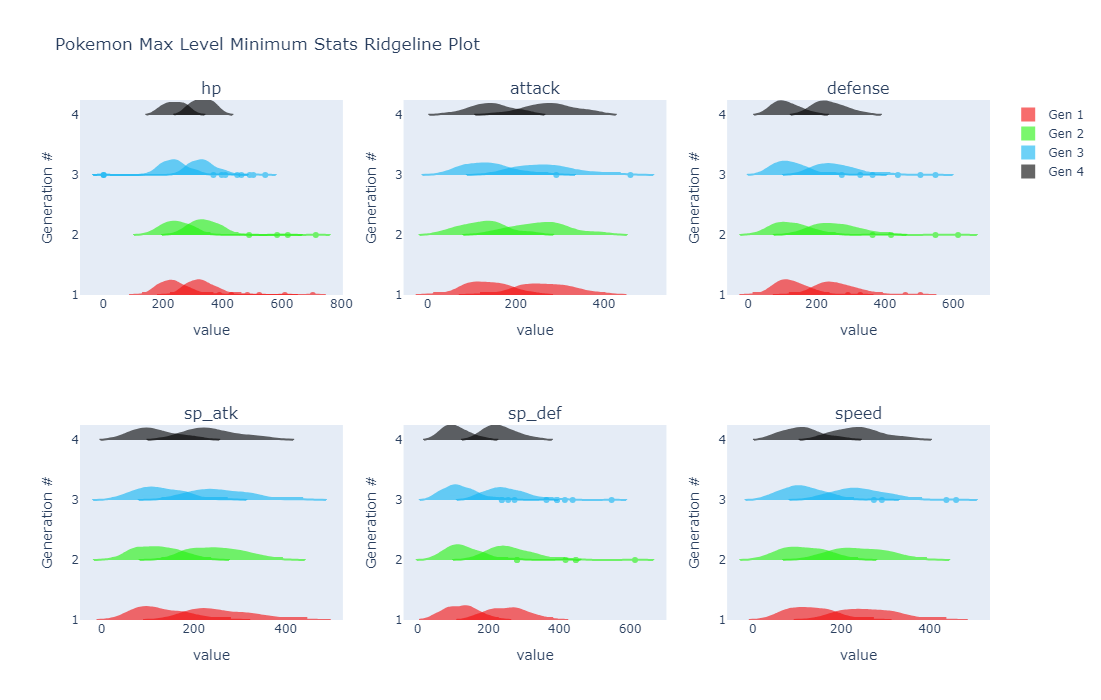

In [321]:
# Define 2x3 facet containing in total 6 subplots
subplot = make_subplots(rows=2, cols=3, subplot_titles=stats)

added_legend_entries = set()

# Use y-axis for vertical orientation and reorder generations for descending display
for i, stat in enumerate(stats):
    # Define rows and columns
    row = (i // 3) + 1  
    col = (i % 3) + 1   

    # Create violin subplot for available generations
    for gen, sub_df in df.groupby('gen'):
        is_first_gen = gen not in added_legend_entries
        if is_first_gen:
            added_legend_entries.add(gen)
            show_legend = True
        else:
            show_legend = False

        # Adjust orientation to y-axis and reverse generation order
        subplot.add_trace(
            go.Violin(
                x=sub_df[f'min_{stat}'],
                y0=gen,
                name=f'Gen {gen}',
                fillcolor=gen_colors[gen],
                line=dict(color=gen_colors[gen]),
                opacity=0.6,
                box_visible=True,
                meanline_visible=True,
                side='positive',
                showlegend=show_legend
            ),
            row=row,
            col=col
        )

        # Add max values to plots 
        subplot.add_trace(
            go.Violin(
                x=sub_df[f'max_{stat}'],
                y0=gen,
                name=f'Gen {gen} Max',
                fillcolor=gen_colors[gen],
                line=dict(color=gen_colors[gen]),
                opacity=0.6,
                box_visible=True,
                meanline_visible=True,
                side='positive',
                showlegend=False
            ),
            row=row,
            col=col
        )

# Update layout
subplot.update_layout(
    title="Pokemon Max Level Minimum Stats Ridgeline Plot",
    height=700,
    width=1000,
    showlegend=True,
    violinmode="overlay"
)

# Update axes for desired output
subplot.update_xaxes(title_text='value', range=[0, None])
subplot.update_yaxes(title_text='Generation #', showticklabels=True)

# Show the plot
subplot.show()

In [322]:
# subplot.print_grid 

### Correct and Enhance the Visualisation

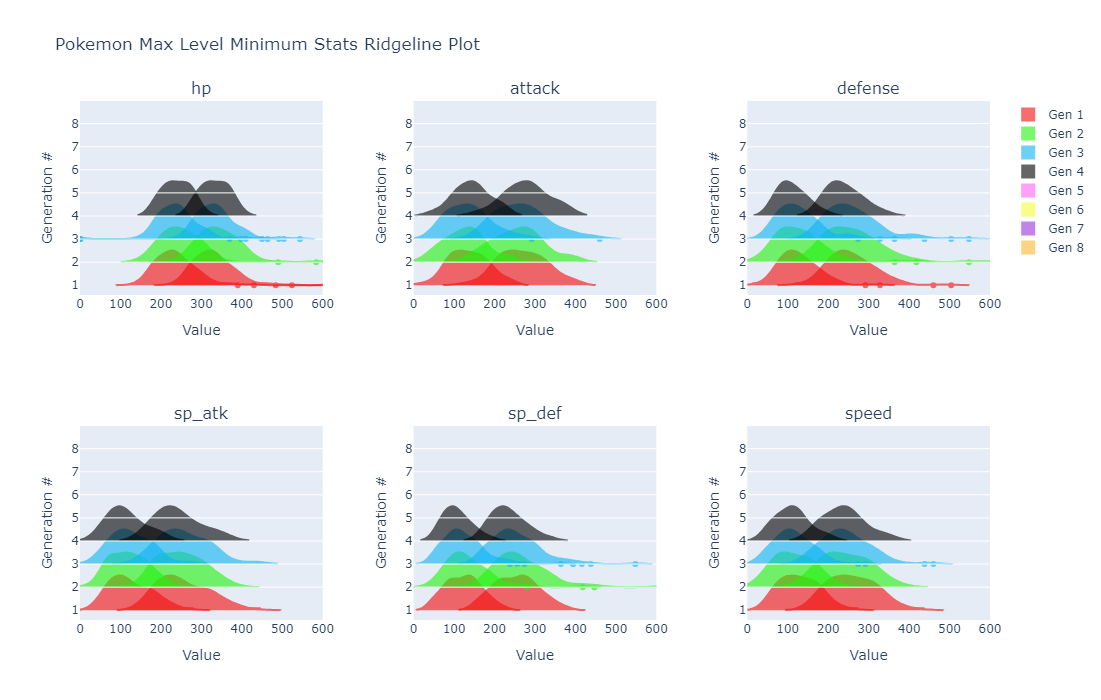

In [323]:
# Define 2x3 total of 6 subplots
enhanced_subplot = make_subplots(
    rows=2,
    cols=3,
    # Add titles for each plot
    subplot_titles=stats,
    # Add spacing so "Generations #" doesnt overlap to previous plot
    horizontal_spacing=0.1  
)

added_legend_entries = set()

for i, stat in enumerate(stats):
    # Define rows and columns
    row = (i // 3) + 1  
    col = (i % 3) + 1   

    # Create violin subplot for available generations
    for gen, sub_df in df.groupby('gen'):
        show_legend = gen not in added_legend_entries
        if show_legend:
            added_legend_entries.add(gen)

        # Trace for min stat values
        enhanced_subplot.add_trace(
            go.Violin(
                x=sub_df[f'min_{stat}'],
                y0=f'{gen}',
                name=f'Gen {gen}',
                fillcolor=gen_colors[gen],
                line=dict(color=gen_colors[gen]),
                opacity=0.6,
                box_visible=True,
                meanline_visible=True,
                side='positive',
                showlegend=show_legend,
                # Add width to plots
                width=3
            ),
            row=row,
            col=col,
        )
        # Trace for max stat values
        enhanced_subplot.add_trace(
            go.Violin(
                x=sub_df[f'max_{stat}'],
                y0=f'{gen}',
                name=f'Gen {gen}',
                fillcolor=gen_colors[gen],
                line=dict(color=gen_colors[gen]),
                opacity=0.6,
                box_visible=True,
                meanline_visible=True,
                side='positive',
                showlegend=False,
                # Add width to plots
                width=3
            ),
            row=row,
            col=col,
        )

# Placeholders for generations 5-8 to show on y-axis
# If this is tested with fully scraped Pokemon dataset, the below can be commented out
for gen in range(5, 9):
    for row in range(1, 3):
        for col in range(1, 4):
            enhanced_subplot.add_trace(
                go.Violin(
                    x=[None],  # No data, just a placeholder
                    y0=f'{gen}',
                    name=f'Gen {gen}',
                    fillcolor=gen_colors[gen],
                    line=dict(color=gen_colors[gen]),
                    opacity=0.6,
                    showlegend=(row == 1 and col == 1) 
                ),
                row=row,
                col=col
            )

# Update layout
enhanced_subplot.update_layout(
    title="Pokemon Max Level Minimum Stats Ridgeline Plot",
    height=700, width=1000, showlegend=True, violinmode="overlay",
)

# Set x and y axis labels and ranges for all subplots
for i in range(1, 7):
    row = (i // 3) + 1
    col = (i % 3) + 1
    enhanced_subplot.update_yaxes(title_text='Generation #', showticklabels=True, row=row)
    enhanced_subplot.update_xaxes(title_text='Value', range=[0, 600], dtick=100, row=row) 

# Add white lines to the plots
for row in range(1, 3):
    for col in range(1, 4):
        for gen in range(1, 9):
            enhanced_subplot.add_shape(
                type="line", x0=0, x1=600, y0=gen, y1=gen,
                xref=f"x{(col + (row - 1) * 3)}",
                yref=f"y{(col + (row - 1) * 3)}",
                line=dict(color="white", width=1, dash="solid")
            )

# Show the plot
enhanced_subplot.show()